In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn_extra.cluster import KMedoids
from sklearn.decomposition import PCA

from sklearn.metrics import  silhouette_score
from sklearn import datasets
from scipy.cluster.hierarchy import dendrogram, linkage
from yellowbrick.cluster import SilhouetteVisualizer

pd.set_option('display.max_columns', None)

import warnings
warnings.simplefilter(action='ignore')

In [2]:
data = pd.read_csv('data.csv')
data_new = pd.read_csv('data_new.csv')
data_encoded = pd.read_csv('data_encoded.csv')

data_campain = pd.read_csv('data_campain.csv')
num_purchases = pd.read_csv('num_purchases.csv')
data_monetary = pd.read_csv('data_monetary.csv')

df = data_new.join(data_campain)
df = df.join(num_purchases)

# Models

## K-Means

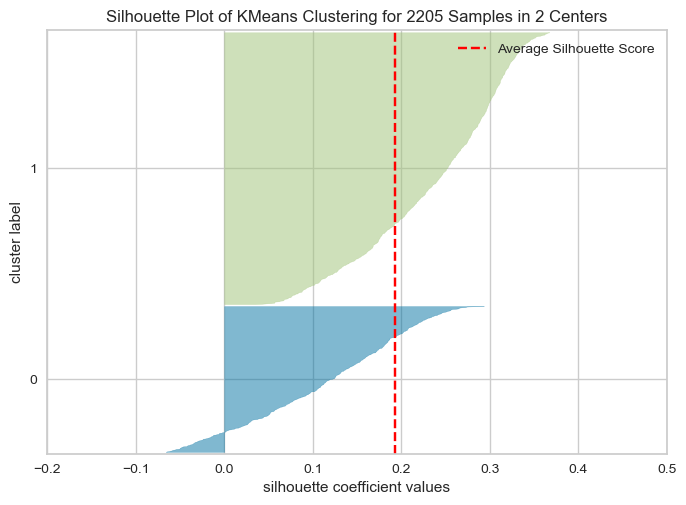

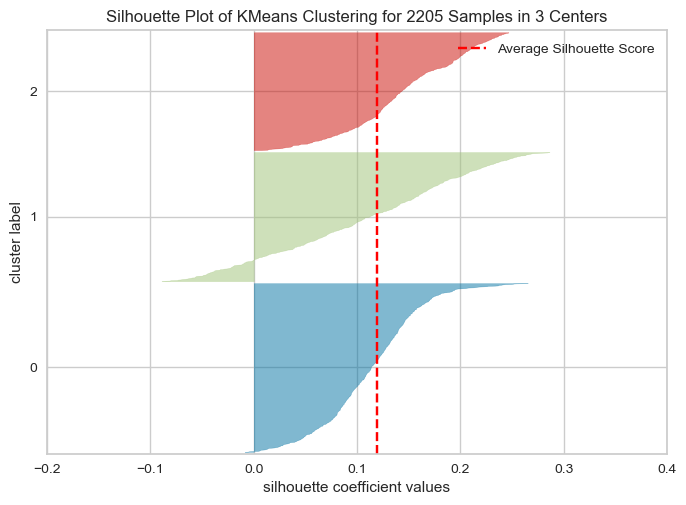

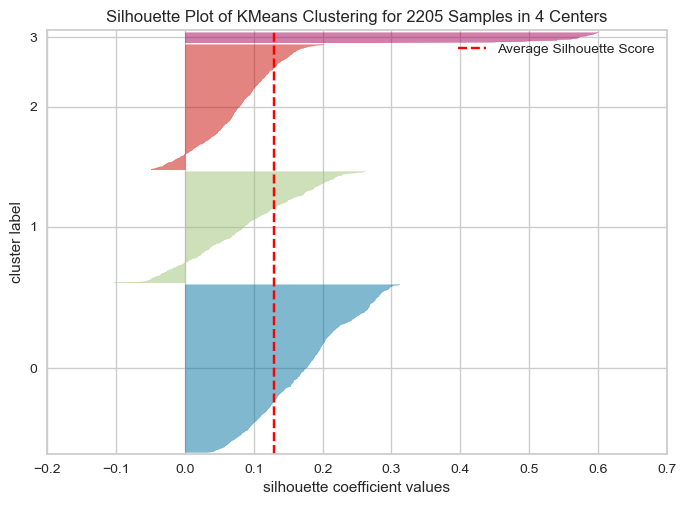

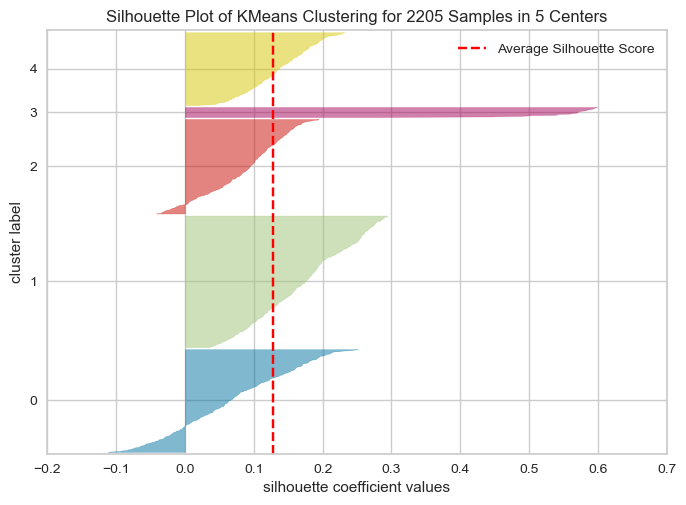

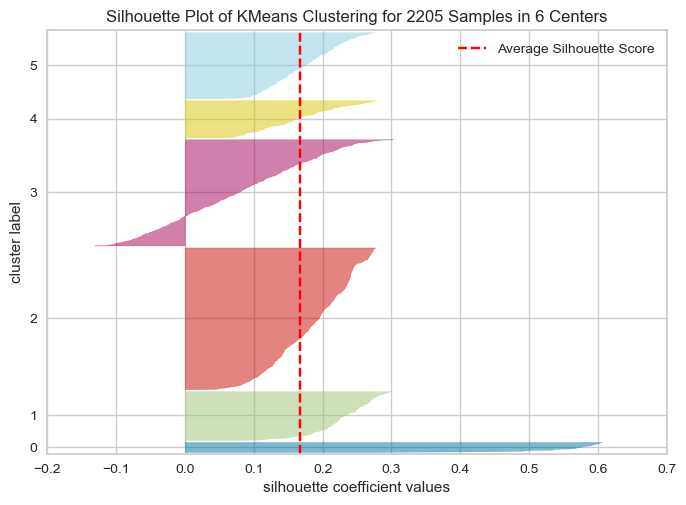

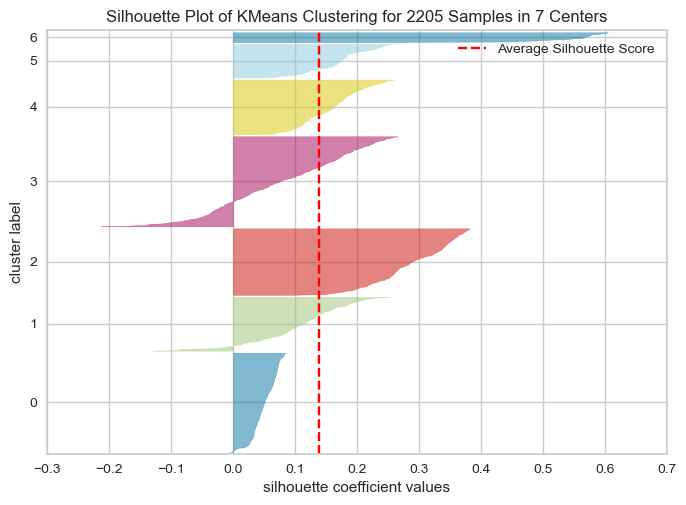

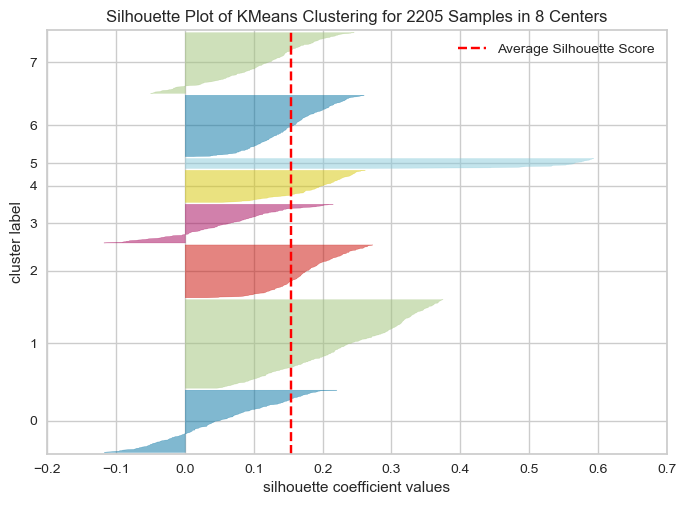

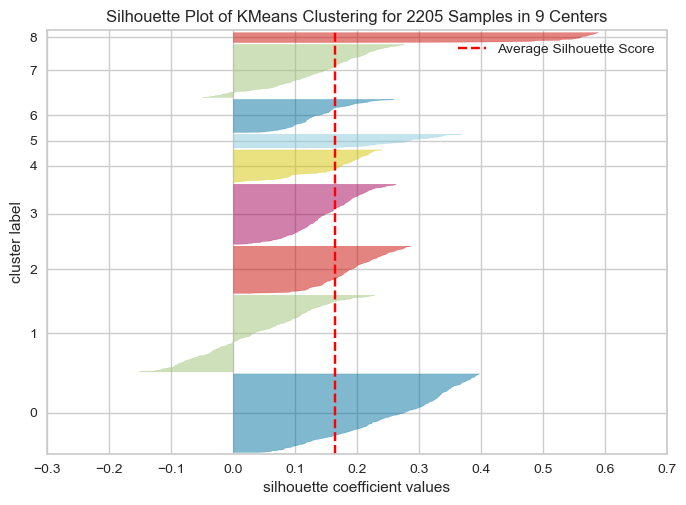

In [3]:
ss = StandardScaler()

'''fit scaler on numeric features'''
ss.fit(data_encoded)

'''scale numeric features'''
data_encoded_scaled = ss.transform(data_encoded)

# sillhouette Score -1 έως 1

sillhouette_list= []
inertia_list= []
for i in range(2,10):
    model_kmeans = KMeans(n_clusters=i, random_state=0,  max_iter=100).fit(data_encoded_scaled)
    visualizer = SilhouetteVisualizer(model_kmeans, colors='yellowbrick')
    visualizer.fit(data_encoded_scaled)
    silhouette_avg = silhouette_score(data_encoded_scaled, model_kmeans.labels_)
    visualizer.poof()
    sillhouette_list.append(silhouette_avg)
    iner = model_kmeans.inertia_
    inertia_list.append(iner)

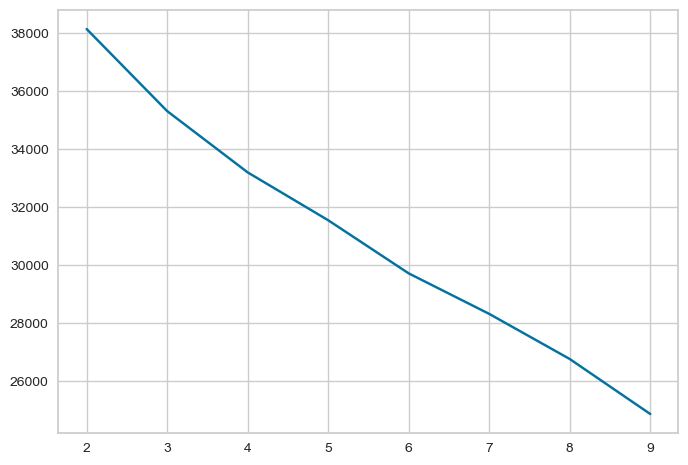

In [4]:
plt.plot([x for x in range(2, 10)], inertia_list)

## K-Means & num_purchases

In [5]:
df_enc_num = data_encoded.join(num_purchases)

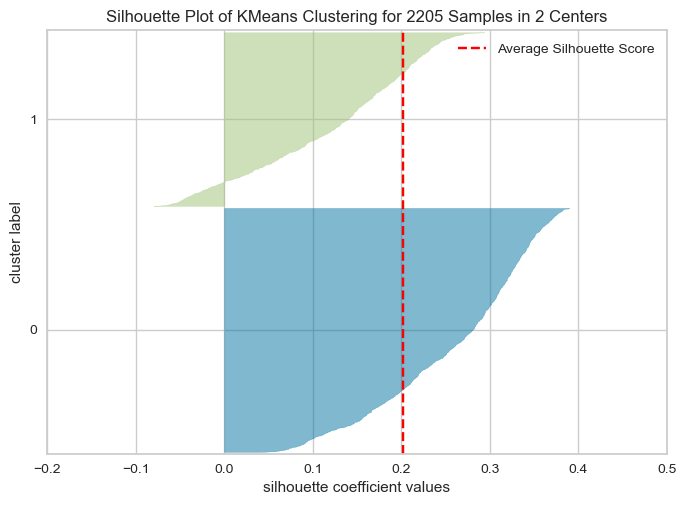

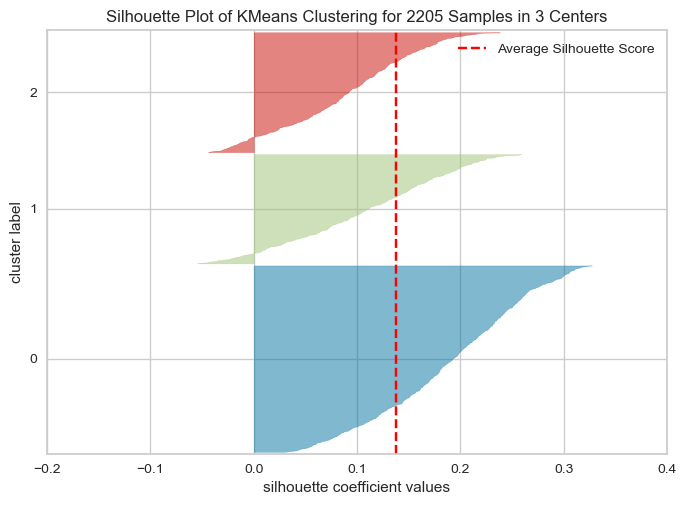

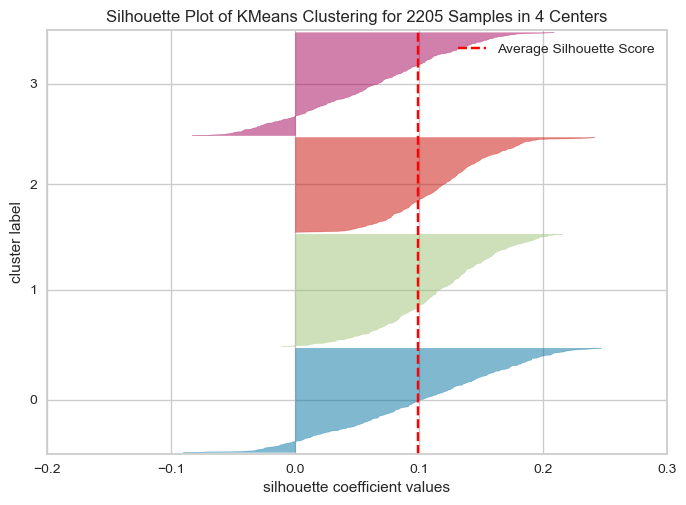

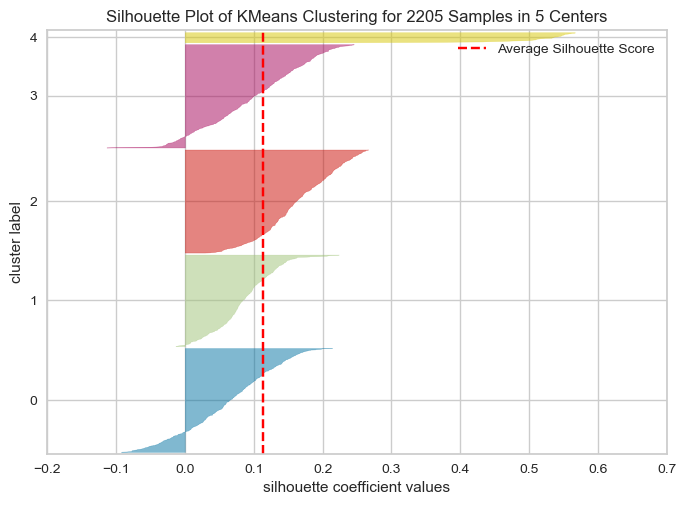

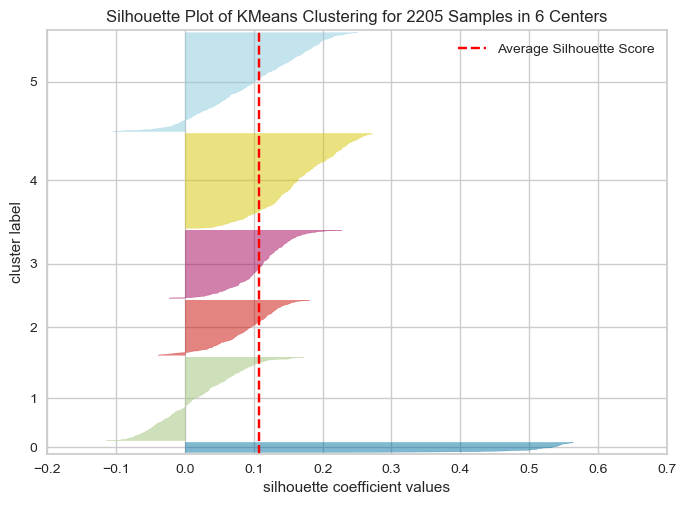

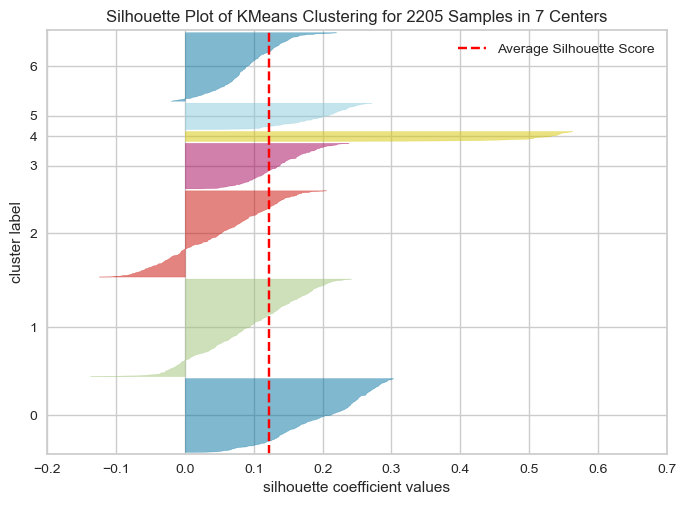

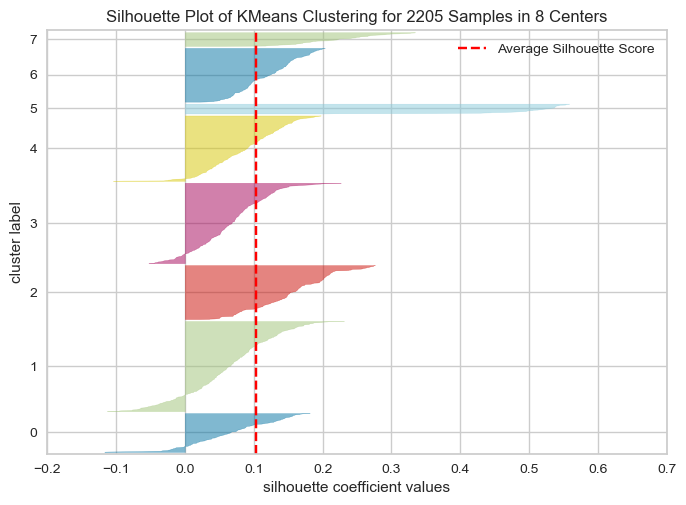

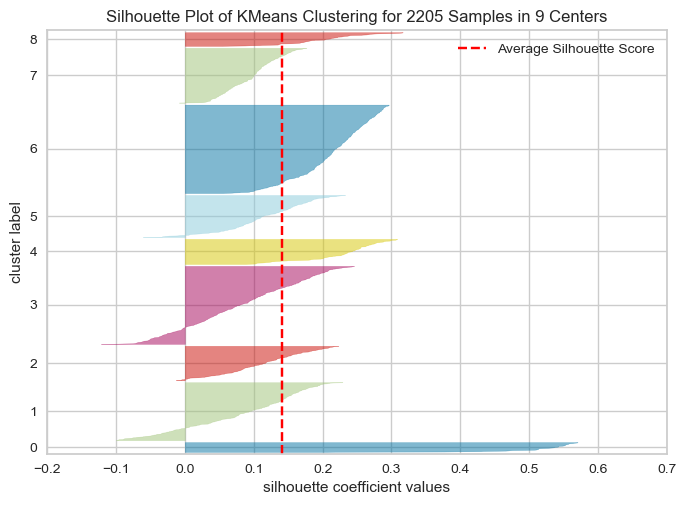

In [6]:
ss = StandardScaler()

'''fit scaler on numeric features'''
ss.fit(df_enc_num)

'''scale numeric features'''
df_enc_num_scaled = ss.transform(df_enc_num)

# sillhouette Score -1 έως 1

sillhouette_list= []
inertia_list= []
for i in range(2,10):
    model_kmeans = KMeans(n_clusters=i, random_state=0,  max_iter=100).fit(df_enc_num_scaled)
    visualizer = SilhouetteVisualizer(model_kmeans, colors='yellowbrick')
    visualizer.fit(df_enc_num_scaled)
    silhouette_avg = silhouette_score(df_enc_num_scaled, model_kmeans.labels_)
    visualizer.poof()
    sillhouette_list.append(silhouette_avg)
    iner = model_kmeans.inertia_
    inertia_list.append(iner)

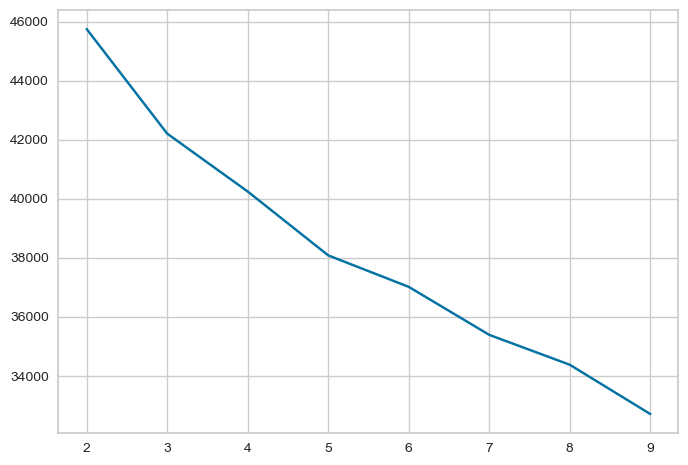

In [7]:
plt.plot([x for x in range(2, 10)], inertia_list)

## K-Means & num_purchases & data_campaign

In [8]:
df_enc_num_camp = df_enc_num.join(data_campain)

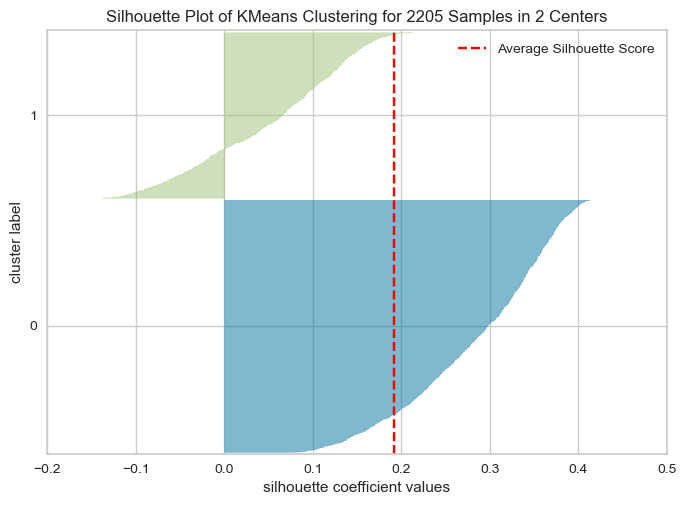

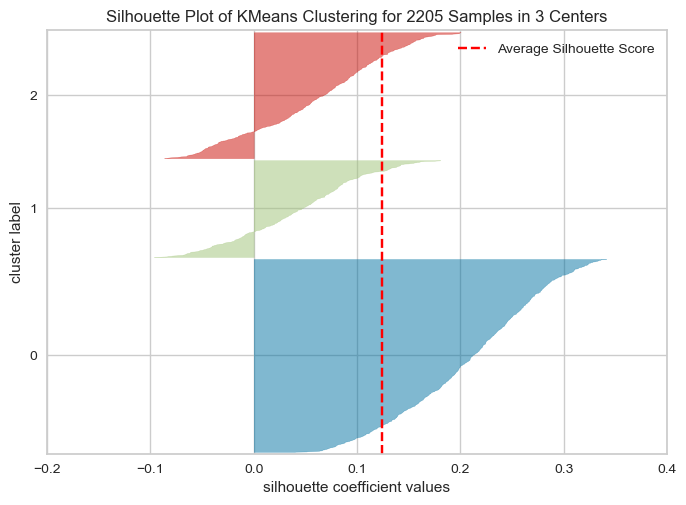

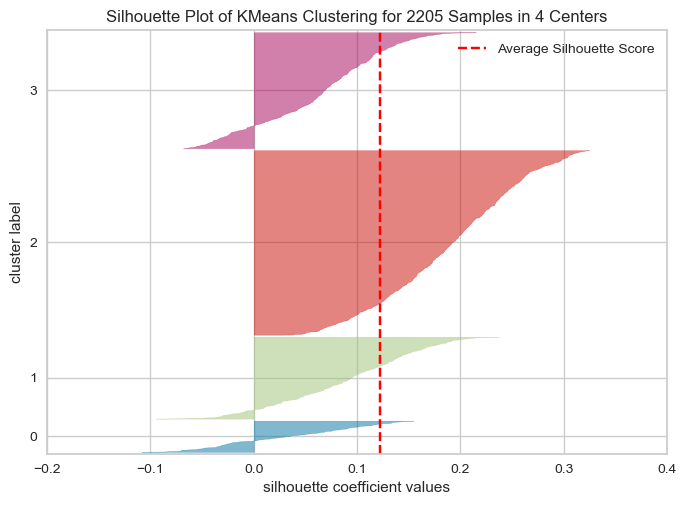

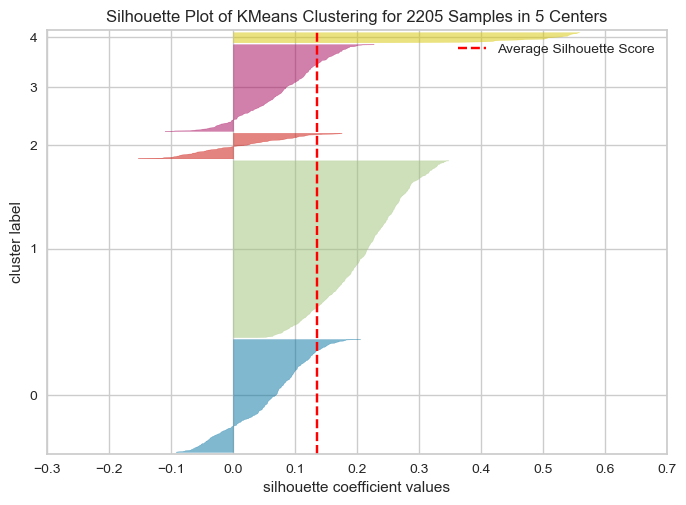

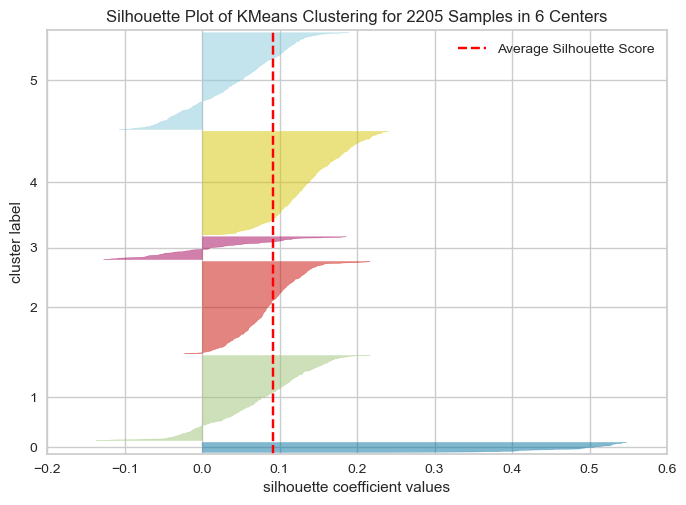

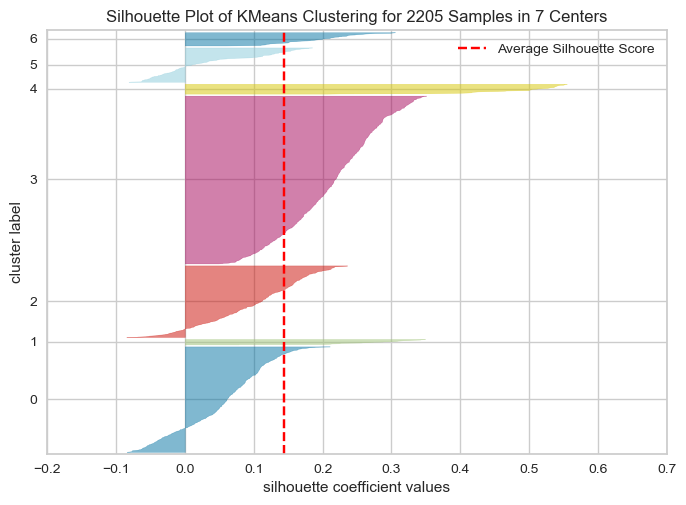

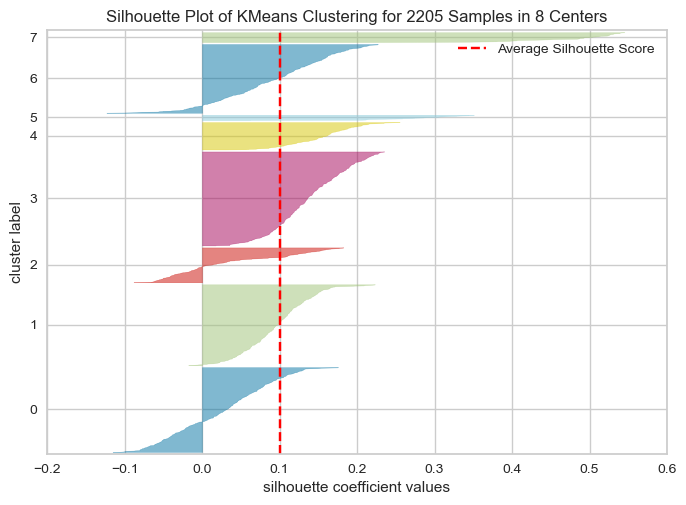

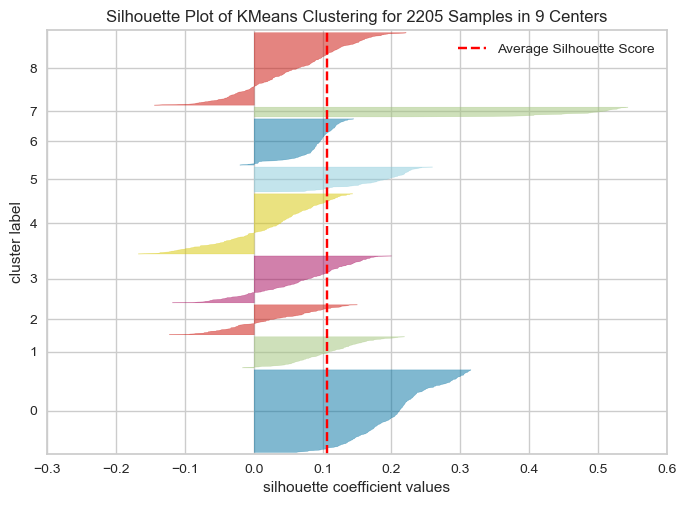

In [9]:
ss = StandardScaler()

'''fit scaler on numeric features'''
ss.fit(df_enc_num_camp)

'''scale numeric features'''
df_enc_num_camp_scaled = ss.transform(df_enc_num_camp)

# sillhouette Score -1 έως 1

sillhouette_list= []
inertia_list= []
for i in range(2,10):
    model_kmeans = KMeans(n_clusters=i, random_state=0,  max_iter=100).fit(df_enc_num_camp_scaled)
    visualizer = SilhouetteVisualizer(model_kmeans, colors='yellowbrick')
    visualizer.fit(df_enc_num_camp_scaled)
    silhouette_avg = silhouette_score(df_enc_num_camp_scaled, model_kmeans.labels_)
    visualizer.poof()
    sillhouette_list.append(silhouette_avg)
    iner = model_kmeans.inertia_
    inertia_list.append(iner)


k_clusters_3 = KMeans(n_clusters=3, random_state=0,  max_iter=100).fit_predict(df_enc_num_camp_scaled)
df['k_clusters_3'] = k_clusters_3

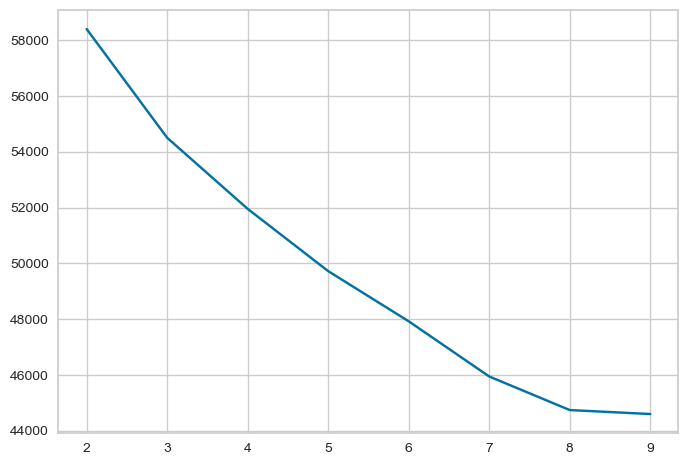

In [10]:
plt.plot([x for x in range(2, 10)], inertia_list)

## Agglomerative - (3 clusters / ward)

In [11]:
model = AgglomerativeClustering(n_clusters=3, linkage='ward')

model.fit_predict(data_encoded_scaled)

'''attribute clusters to customers'''
y_hier = model.labels_
y_hier_data_encoded_scaled = pd.DataFrame(y_hier)
y_hier_data_encoded_scaled.rename({0: 'cluster'}, axis=1, inplace=True)

In [12]:
y_hier_data_encoded_scaled.cluster.value_counts()

cluster
0    1417
1     489
2     299
Name: count, dtype: int64

## Agglomerative & num_purchases - (3 clusters / ward)

In [13]:
model = AgglomerativeClustering(n_clusters=3, linkage='ward')

model.fit_predict(df_enc_num_scaled)

'''attribute clusters to customers'''
y_hier = model.labels_
y_hier_data_encoded_scaled = pd.DataFrame(y_hier)
y_hier_data_encoded_scaled.rename({0: 'cluster'}, axis=1, inplace=True)
y_hier_data_encoded_scaled.cluster.value_counts()

cluster
2    1033
0     733
1     439
Name: count, dtype: int64

## Agglomerative & num_purchases & data_campaign - (3 clusters / ward)

In [14]:
model = AgglomerativeClustering(n_clusters=3, linkage='ward')

model.fit_predict(df_enc_num_camp_scaled)

'''attribute clusters to customers'''
y_hier = model.labels_
y_hier_data_encoded_scaled = pd.DataFrame(y_hier)
y_hier_data_encoded_scaled.rename({0: 'cluster'}, axis=1, inplace=True)
y_hier_data_encoded_scaled.cluster.value_counts()

ag_clusters_3 = model.fit_predict(df_enc_num_camp_scaled)
df['ag_clusters_3'] = ag_clusters_3

## DBSCAN - multiple experiments

In [15]:
# Create DBSCAN model
model = DBSCAN(eps=2, min_samples=50)

# Fit and predict
y_dbscan = model.fit_predict(df_enc_num_camp_scaled)

# Attribute clusters to customers
y_dbscan_data_encoded_scaled = pd.DataFrame(y_dbscan, columns=['cluster'])

# Display cluster counts
print(y_dbscan_data_encoded_scaled['cluster'].value_counts())

cluster
-1    2137
 0      68
Name: count, dtype: int64


In [16]:
# Create DBSCAN model
model = DBSCAN(eps=2, min_samples=50)

# Fit and predict
y_dbscan = model.fit_predict(df_enc_num_camp_scaled)

# Attribute clusters to customers
y_dbscan_data_encoded_scaled = pd.DataFrame(y_dbscan, columns=['cluster'])

# Display cluster counts
print(y_dbscan_data_encoded_scaled['cluster'].value_counts())

cluster
-1    2137
 0      68
Name: count, dtype: int64


In [17]:
# Create DBSCAN model
model = DBSCAN(eps=3, min_samples=50)

# Fit and predict
y_dbscan = model.fit_predict(df_enc_num_camp_scaled)

# Attribute clusters to customers
y_dbscan_data_encoded_scaled = pd.DataFrame(y_dbscan, columns=['cluster'])

# Display cluster counts
print(y_dbscan_data_encoded_scaled['cluster'].value_counts())

cluster
-1    1716
 1     224
 0     122
 2      92
 3      51
Name: count, dtype: int64


## KMedoids - 4 clusters (tried also 3)

In [18]:
# Initialize KMedoids model
kmedoids = KMedoids(n_clusters=4, random_state=42)

# Fit the model and predict clusters
y_kmedoids = kmedoids.fit_predict(data_encoded_scaled)

# Create a DataFrame with cluster assignments
y_kmedoids_data = pd.DataFrame(y_kmedoids, columns=['cluster'])

# Display cluster counts
print(y_kmedoids_data['cluster'].value_counts())

cluster
0    722
2    661
3    553
1    269
Name: count, dtype: int64


## KMedoids & num_purchases - 4 clusters (tried also 3)

In [19]:
# Initialize KMedoids model
kmedoids = KMedoids(n_clusters=4, random_state=42)

# Fit the model and predict clusters
y_kmedoids = kmedoids.fit_predict(df_enc_num_scaled)

# Create a DataFrame with cluster assignments
y_kmedoids_data = pd.DataFrame(y_kmedoids, columns=['cluster'])

# Display cluster counts
print(y_kmedoids_data['cluster'].value_counts())

cluster
1    578
0    568
2    533
3    526
Name: count, dtype: int64


## KMedoids & num_purchases & data_campaign - 4 clusters (tried also 3)

In [20]:
# Initialize KMedoids model
kmedoids = KMedoids(n_clusters=4, random_state=42)

# Fit the model and predict clusters
y_kmedoids = kmedoids.fit_predict(df_enc_num_camp_scaled)

# Create a DataFrame with cluster assignments
y_kmedoids_data = pd.DataFrame(y_kmedoids, columns=['cluster'])

# Display cluster counts
print(y_kmedoids_data['cluster'].value_counts())

kmedoids = KMedoids(n_clusters=3, random_state=42)
kmed_clusters_3 = kmedoids.fit_predict(df_enc_num_camp_scaled)
df['kmed_clusters_3'] = kmed_clusters_3

cluster
3    815
0    551
2    455
1    384
Name: count, dtype: int64


## KMedoids and K-Means in full data with PCA retaining 90%

### KMedoids - PCA

In [21]:
# Apply PCA
pca = PCA(n_components=0.90)  # Retain 95% of the variance
df_pca = pca.fit_transform(df_enc_num_camp_scaled)

# Initialize KMedoids model
kmedoids = KMedoids(n_clusters=4, random_state=42)

# Fit the model and predict clusters
y_kmedoids = kmedoids.fit_predict(df_pca)

# Create a DataFrame with cluster assignments
y_kmedoids_data = pd.DataFrame(y_kmedoids, columns=['cluster'])

# Display cluster counts
print(y_kmedoids_data['cluster'].value_counts())

cluster
1    903
3    467
2    458
0    377
Name: count, dtype: int64


### K-Means - PCA

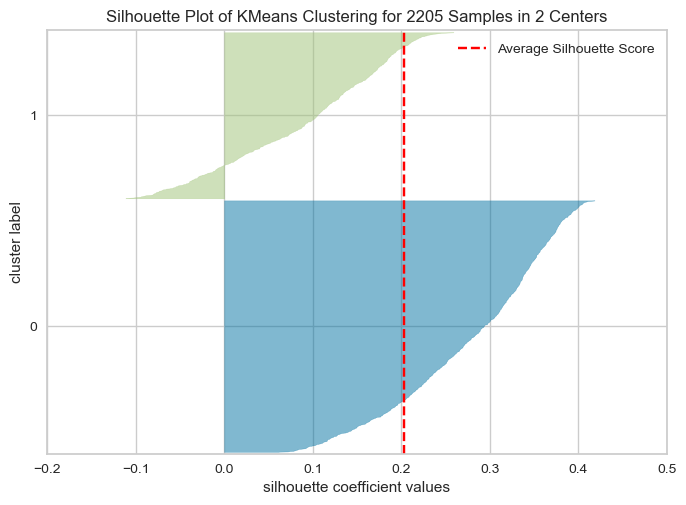

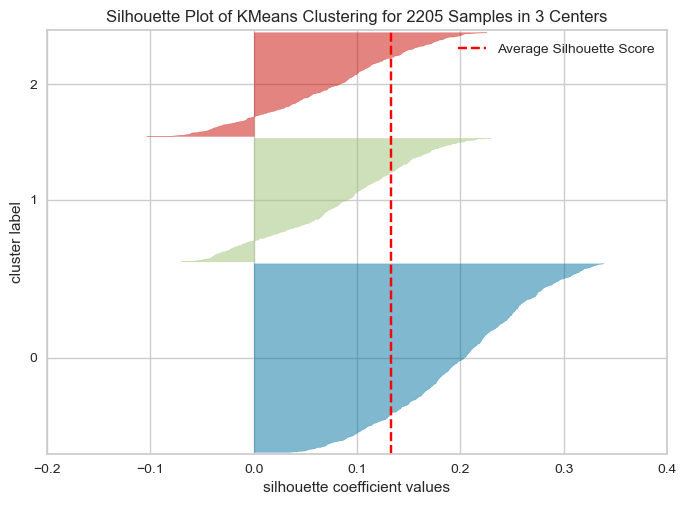

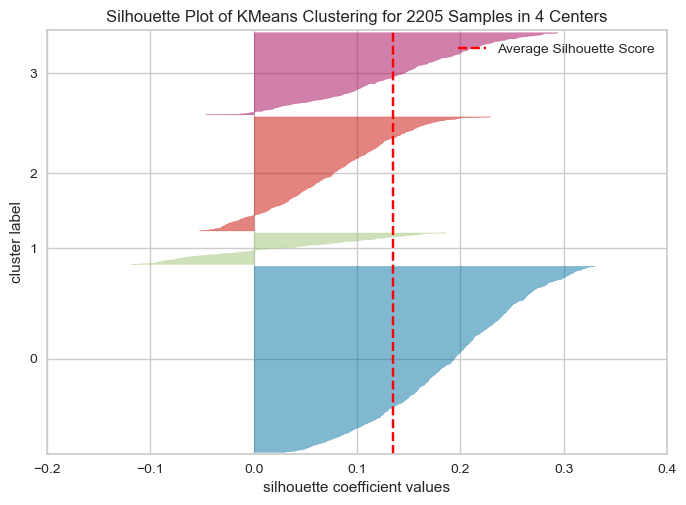

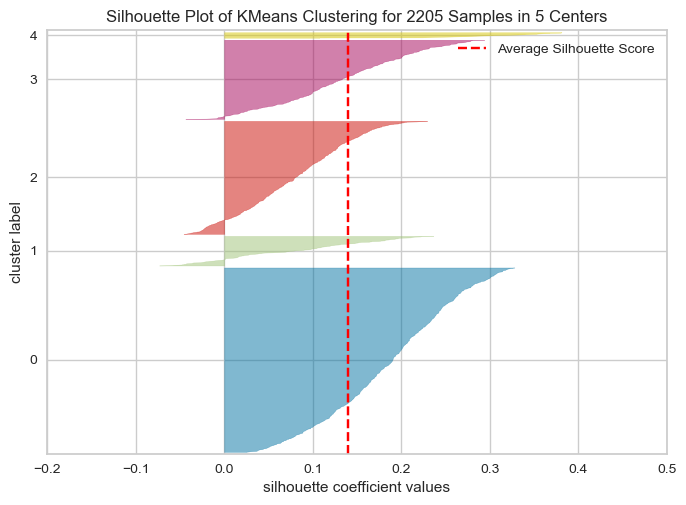

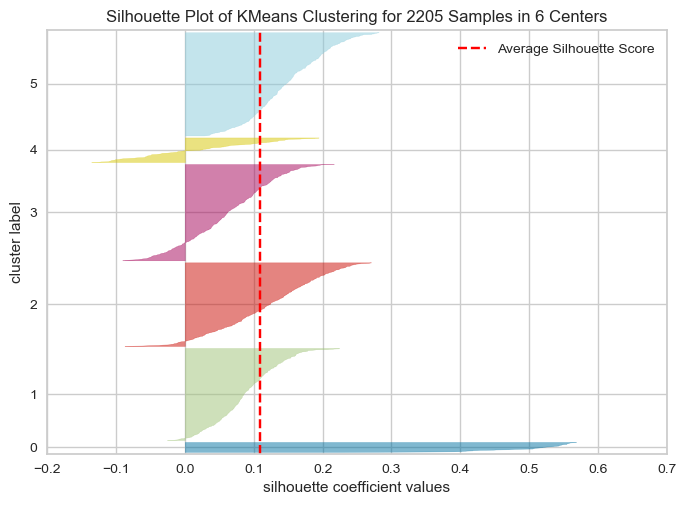

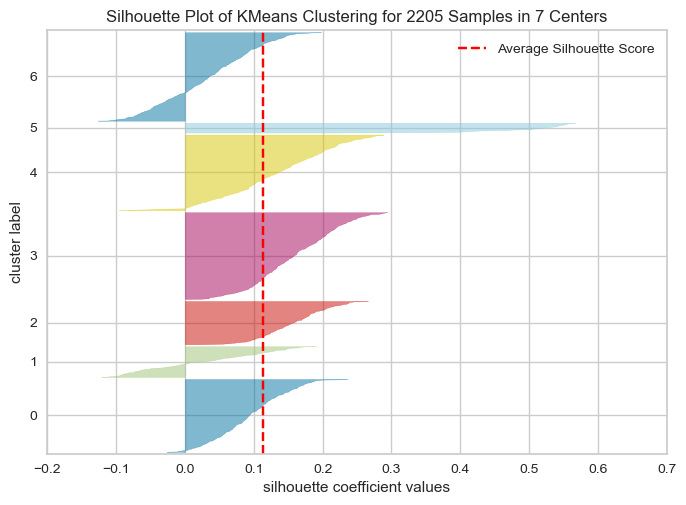

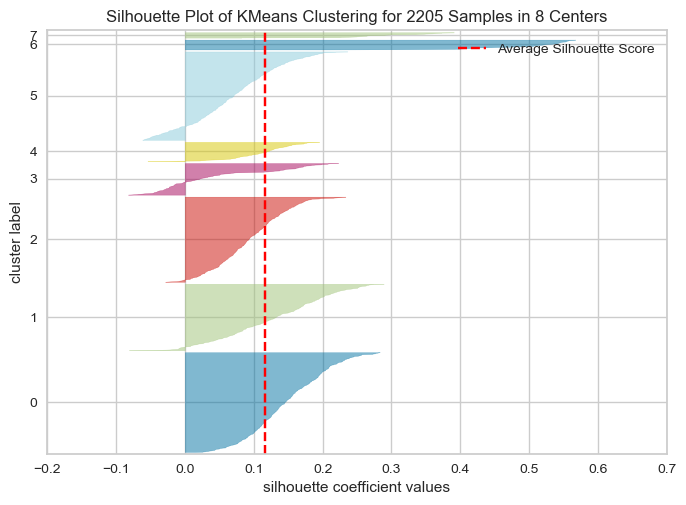

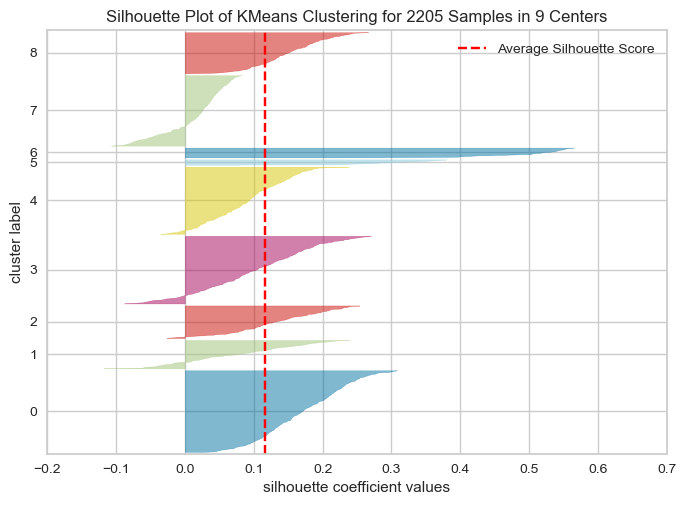

In [22]:
sillhouette_list= []
inertia_list= []
for i in range(2,10):
    model_kmeans = KMeans(n_clusters=i, random_state=0,  max_iter=100).fit(df_pca)
    visualizer = SilhouetteVisualizer(model_kmeans, colors='yellowbrick')
    visualizer.fit(df_pca)
    silhouette_avg = silhouette_score(df_pca, model_kmeans.labels_)
    visualizer.poof()
    sillhouette_list.append(silhouette_avg)
    iner = model_kmeans.inertia_
    inertia_list.append(iner)


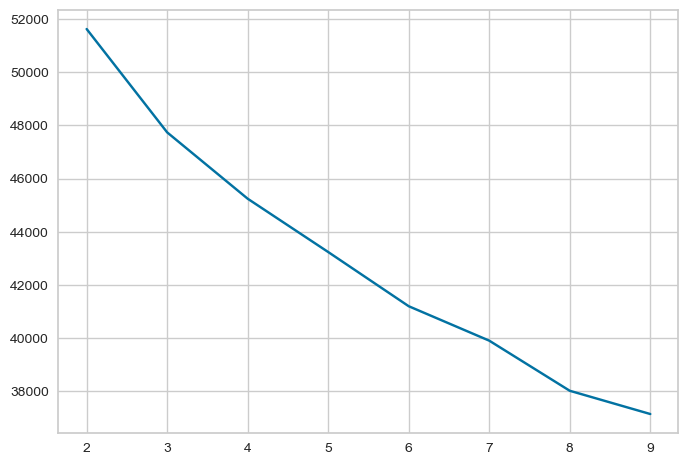

In [23]:
plt.plot([x for x in range(2, 10)], inertia_list)

In [24]:
df.head(1)

,Education,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Dependants,Age,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Z_CostContact,Z_Revenue,Response,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,k_clusters_3,ag_clusters_3,kmed_clusters_3
0,Graduation,Single,58138.0,0,0,635,88,546,172,88,88,0,57,0,0,0,0,0,3,11,1,3,8,10,4,7,1,0,1


In [25]:
numerical_df = df.select_dtypes(exclude='object')

In [26]:
numerical_df.head(1)

,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Dependants,Age,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Z_CostContact,Z_Revenue,Response,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,k_clusters_3,ag_clusters_3,kmed_clusters_3
0,58138.0,0,0,635,88,546,172,88,88,0,57,0,0,0,0,0,3,11,1,3,8,10,4,7,1,0,1


In [27]:
numerical_df.groupby('k_clusters_3').mean()

,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Dependants,Age,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Z_CostContact,Z_Revenue,Response,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,ag_clusters_3,kmed_clusters_3
k_clusters_3,,,,,,,,,,,,,,,,,,,,,,,,,,
0,34749.543500,0.812317,0.447703,42.570870,4.946237,23.565982,7.097752,4.991202,15.618768,1.260020,42.138807,0.074291,0.007820,0.000000,0.000978,0.001955,3.0,11.0,0.096774,2.127077,2.149560,0.552297,3.197458,6.522972,1.110459,0.387097
1,77071.531128,0.031128,0.093385,626.426070,66.848249,479.029183,100.589494,70.431907,76.157588,0.124514,45.215953,0.089494,0.134241,0.289883,0.233463,0.036965,3.0,11.0,0.317121,1.182879,5.001946,6.196498,8.321012,2.696498,0.198444,1.056420
2,58976.612275,0.190120,0.911677,460.859281,27.895210,147.211078,35.738024,27.591317,62.077844,1.101796,49.549401,0.059880,0.130240,0.016467,0.029940,0.013473,3.0,11.0,0.101796,3.492515,6.342814,3.206587,7.872754,5.500000,1.250000,1.720060


In [28]:
numerical_df.groupby('ag_clusters_3').mean()

,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Dependants,Age,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Z_CostContact,Z_Revenue,Response,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,k_clusters_3,kmed_clusters_3
ag_clusters_3,,,,,,,,,,,,,,,,,,,,,,,,,,
0,73575.948113,0.061321,0.325472,610.177673,59.773585,403.963836,84.856918,60.891509,74.772013,0.386792,46.083333,0.066038,0.125786,0.234277,0.207547,0.04717,3.0,11.0,0.261006,1.734277,5.419811,5.526730,8.517296,3.363208,1.290881,1.223270
1,37893.503286,0.720188,0.476995,77.761502,8.873239,41.140845,13.261972,9.224413,20.127700,1.197183,42.849765,0.011268,0.004695,0.004695,0.000000,0.00000,3.0,11.0,0.070423,2.172770,2.568075,0.823474,3.784038,6.245070,0.268545,0.535211
2,54383.021825,0.333333,0.793651,401.781746,21.007937,134.781746,29.253968,22.198413,54.761905,1.126984,48.619048,0.214286,0.156746,0.011905,0.017857,0.00000,3.0,11.0,0.176587,3.373016,5.605159,2.976190,6.666667,5.839286,1.474206,1.468254


In [29]:
numerical_df.groupby('kmed_clusters_3').mean()

,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Dependants,Age,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Z_CostContact,Z_Revenue,Response,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,k_clusters_3,ag_clusters_3
kmed_clusters_3,,,,,,,,,,,,,,,,,,,,,,,,,,
0,35390.392226,0.979976,0.520612,46.444052,4.326266,23.619552,5.965842,4.262662,13.375736,1.500589,42.418139,0.073027,0.009423,0.001178,0.002356,0.002356,3.0,11.0,0.102473,2.356890,2.109541,0.515901,3.233216,6.504122,0.075383,1.103651
1,74324.008013,0.040064,0.206731,565.788462,64.546474,419.238782,94.971154,65.235577,71.892628,0.246795,46.490385,0.065705,0.102564,0.219551,0.177885,0.025641,3.0,11.0,0.243590,1.405449,5.051282,5.599359,8.358974,2.876603,1.171474,0.355769
2,52097.408470,0.159836,0.743169,383.748634,19.267760,118.863388,25.286885,21.056011,55.155738,0.903005,47.028689,0.080601,0.125683,0.030055,0.038251,0.016393,3.0,11.0,0.124317,3.058743,5.551913,2.677596,6.620219,6.032787,1.441257,1.248634


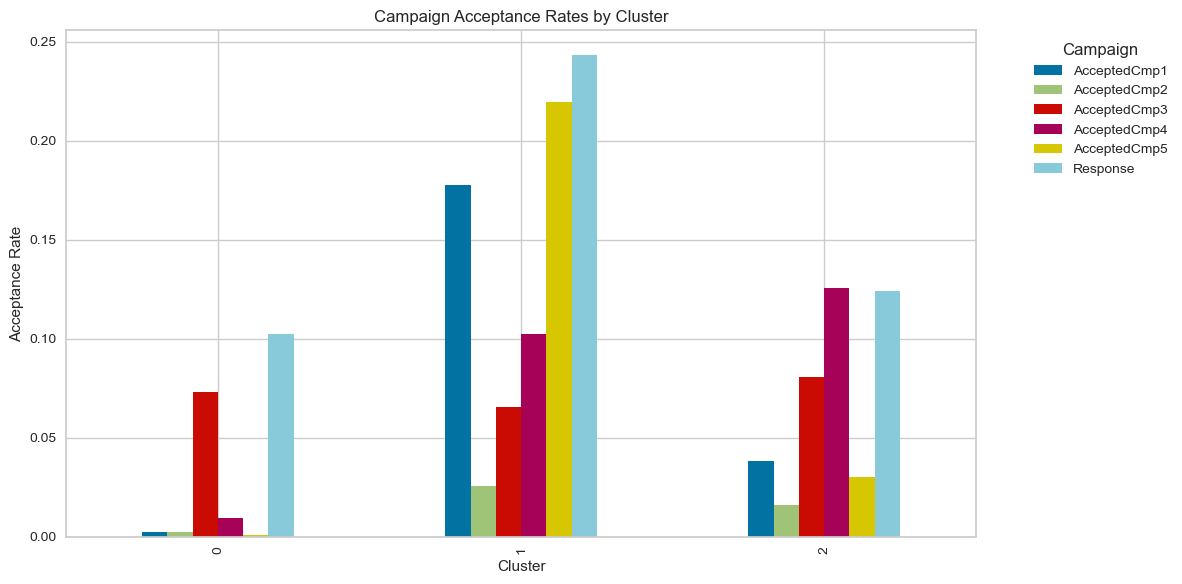

In [30]:
campaigns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
acceptance_rates = df.groupby('kmed_clusters_3')[campaigns].mean()

acceptance_rates.plot(kind='bar', figsize=(12, 6))
plt.title('Campaign Acceptance Rates by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Acceptance Rate')
plt.legend(title='Campaign', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Marital Status Distribution by Cluster')

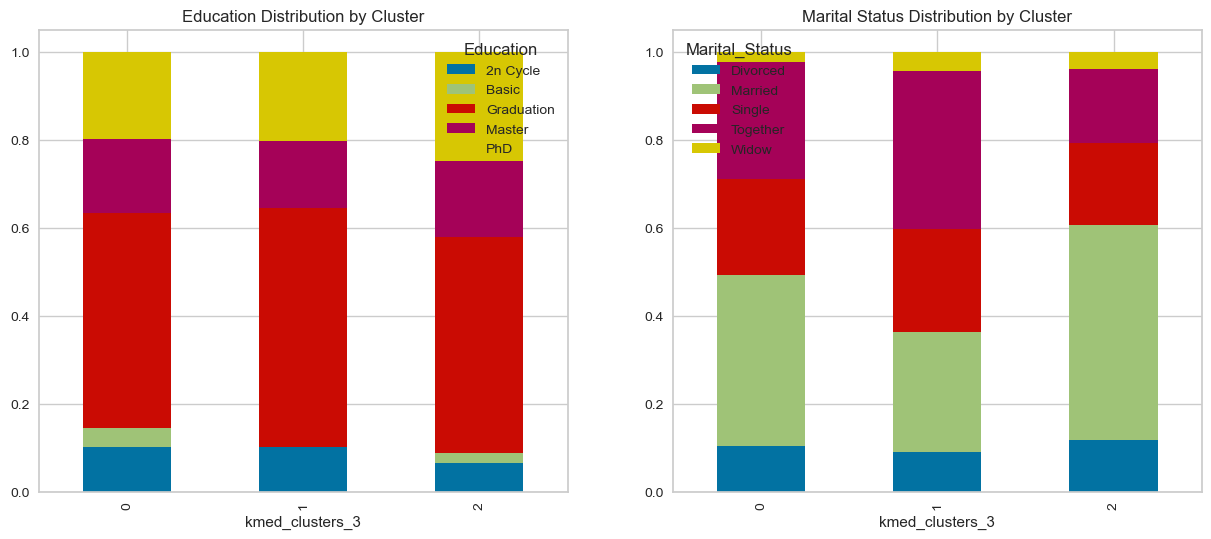

In [31]:
# Education and Marital Status Distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Education distribution
pd.crosstab(df['kmed_clusters_3'], df['Education'], normalize='index').plot(
    kind='bar', stacked=True, ax=ax1)
ax1.set_title('Education Distribution by Cluster')

# Marital status distribution
pd.crosstab(df['kmed_clusters_3'], df['Marital_Status'], normalize='index').plot(
    kind='bar', stacked=True, ax=ax2)
ax2.set_title('Marital Status Distribution by Cluster')

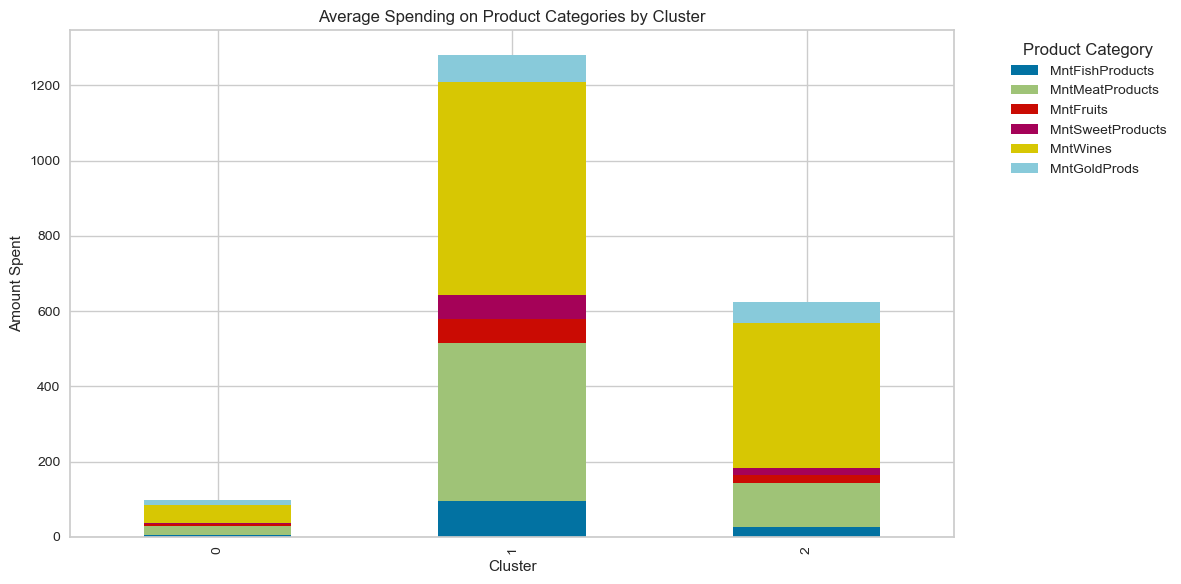

In [32]:
products = ['MntFishProducts', 'MntMeatProducts', 'MntFruits', 'MntSweetProducts', 'MntWines', 'MntGoldProds']
product_spending = df.groupby('kmed_clusters_3')[products].mean()

product_spending.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Average Spending on Product Categories by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Amount Spent')
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

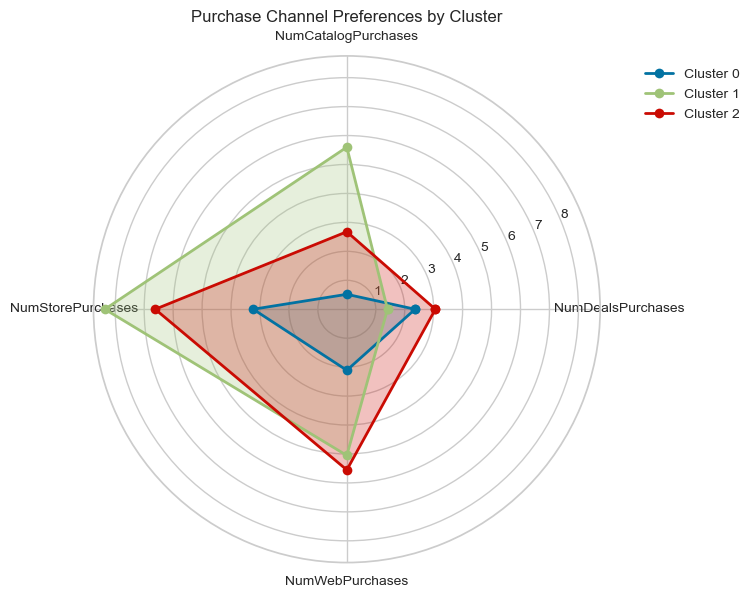

In [33]:
import numpy as np

channels = ['NumDealsPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebPurchases']
channel_data = df.groupby('kmed_clusters_3')[channels].mean()

angles = np.linspace(0, 2*np.pi, len(channels), endpoint=False)
angles = np.concatenate((angles, [angles[0]]))

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(projection='polar'))

for cluster in channel_data.index:
    values = channel_data.loc[cluster].values
    values = np.concatenate((values, [values[0]]))
    ax.plot(angles, values, 'o-', linewidth=2, label=f'Cluster {cluster}')
    ax.fill(angles, values, alpha=0.25)

ax.set_thetagrids(angles[:-1] * 180/np.pi, channels)
ax.set_title('Purchase Channel Preferences by Cluster')
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))

plt.tight_layout()
plt.show()


Text(0, 0.5, 'Average Number of Purchases')

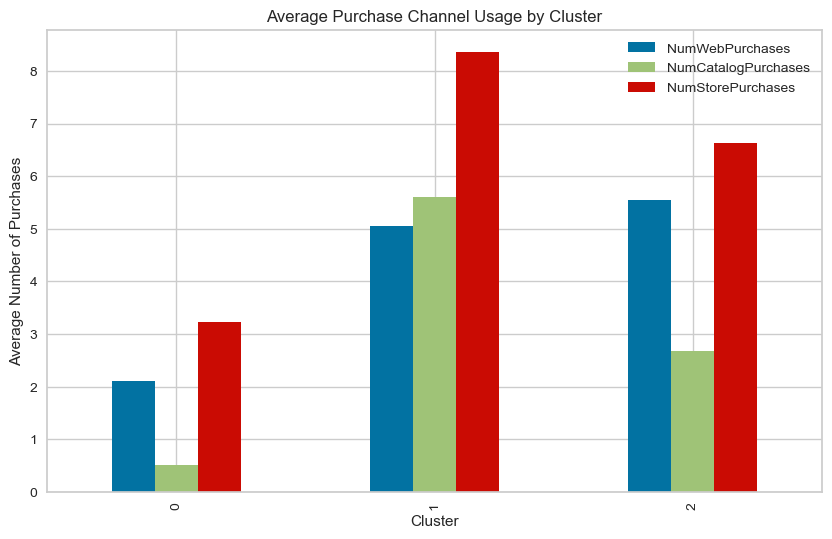

In [34]:
# Purchase channels comparison
purchase_cols = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
purchase_means = df.groupby('kmed_clusters_3')[purchase_cols].mean()

purchase_means.plot(kind='bar', figsize=(10, 6))
plt.title('Average Purchase Channel Usage by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Number of Purchases')


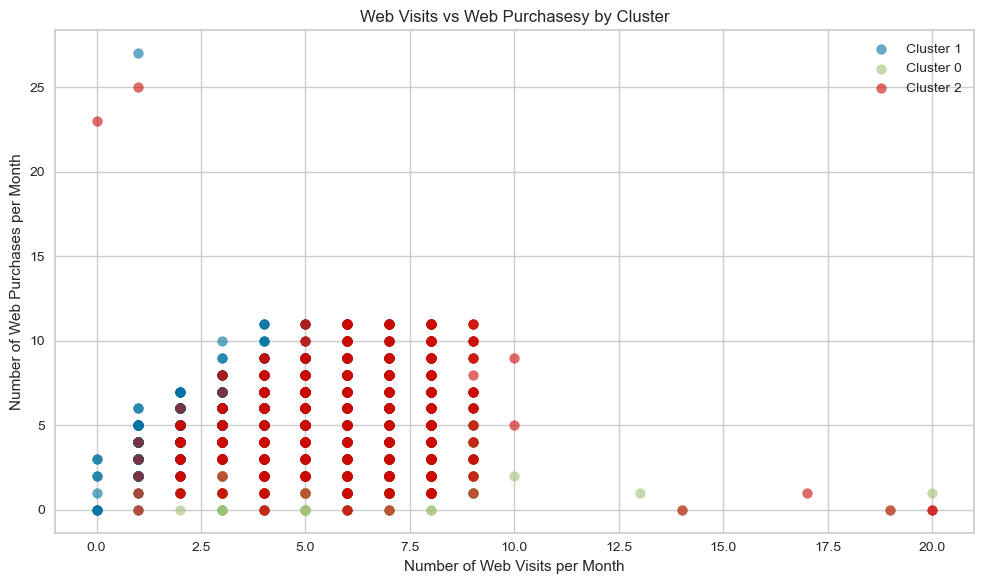

In [35]:
plt.figure(figsize=(10, 6))
for cluster in df['kmed_clusters_3'].unique():
    cluster_data = df[df['kmed_clusters_3'] == cluster]
    plt.scatter(cluster_data['NumWebVisitsMonth'], cluster_data['NumWebPurchases'], 
                label=f'Cluster {cluster}', alpha=0.6)

plt.title('Web Visits vs Web Purchasesy by Cluster')
plt.xlabel('Number of Web Visits per Month')
plt.ylabel('Number of Web Purchases per Month')
plt.legend()
plt.tight_layout()
plt.show()

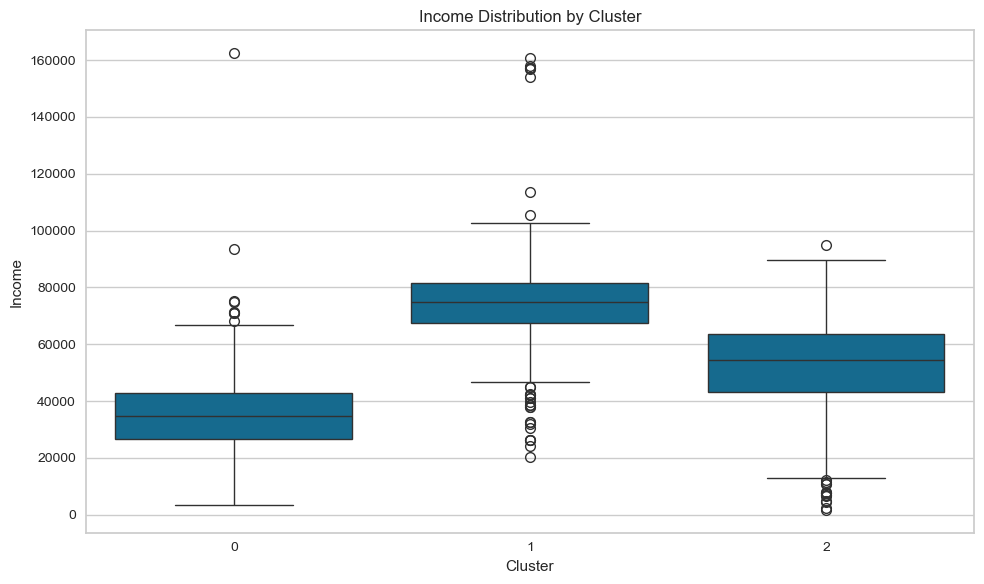

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='kmed_clusters_3', y='Income', data=df)
plt.title('Income Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Income')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Income vs Purchase Frequency by Cluster')

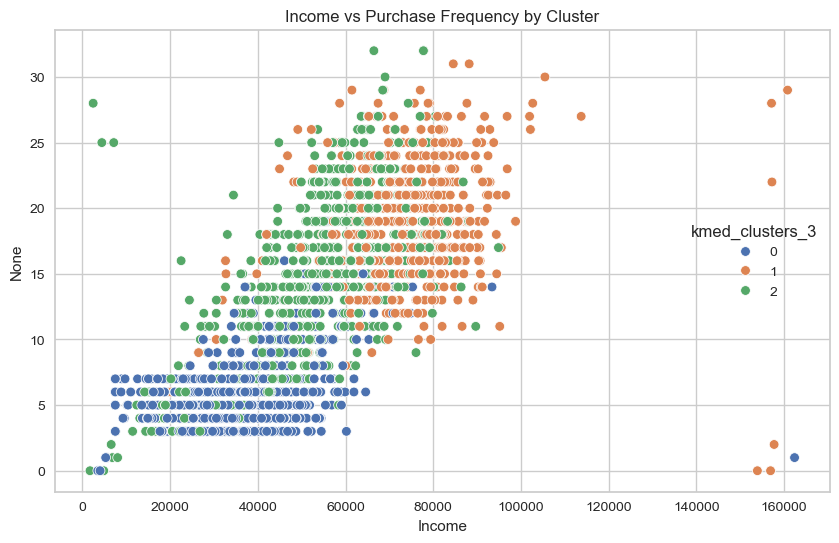

In [37]:
# Recency vs Frequency scatter plot
plt.figure(figsize=(10, 6))
total_purchases = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

sns.scatterplot(data=df, x='Income', y=total_purchases, 
                hue='kmed_clusters_3', palette='deep')
plt.title('Income vs Purchase Frequency by Cluster')

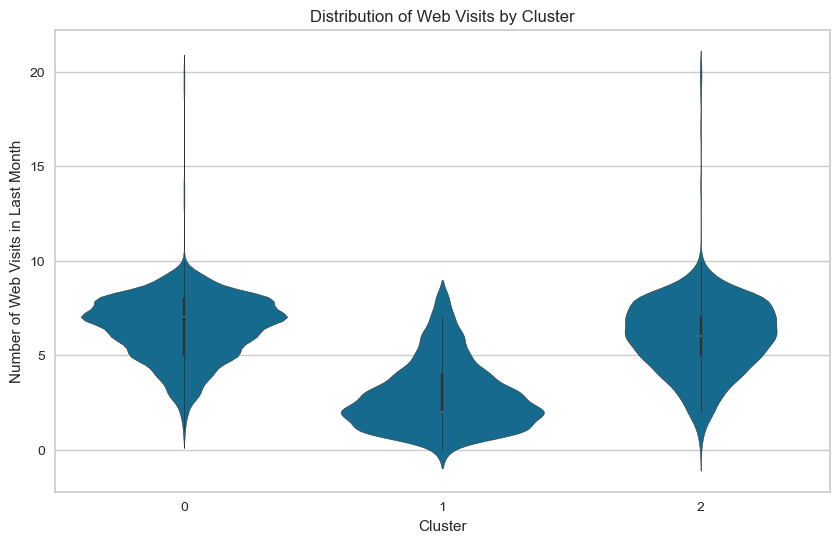

In [39]:

# Create violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='kmed_clusters_3', y='NumWebVisitsMonth', data=df)
plt.title('Distribution of Web Visits by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Web Visits in Last Month')
plt.show()